In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [16]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [17]:
x = df.loc[:,df.columns != 'medv']
y = df.loc[:,df.columns == 'medv']

In [18]:

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [19]:

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [20]:


model = Sequential()
model.add(Dense(128, input_shape=(13,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse' ,metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1792      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(x_train,y_train,epochs=100, validation_split=0.05, verbose = 1)

Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 592.0186 - mae: 22.4504
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 516.5604 - mae: 20.7561
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 423.0358 - mae: 18.4103
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 301.5436 - mae: 15.0704
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 173.5810 - mae: 10.7003
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 96.1556 - mae: 7.5603
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 65.8819 - mae: 6.2452
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 45.0787 - mae: 5.1486
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 34.6846 - mae: 4.4213
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 28.6723 - mae: 4.0115
Epoch 11/100
12/12 [===================

In [22]:
test_mae, test_mse = model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 13.6061 - mae: 2.5805


In [23]:
y_pred = model.predict(x_test)
r2_score(y_test,y_pred)

5/5 [==============================] - 0s 3ms/step


0.8173995904369417

5/5 [==============================] - 0s 3ms/step


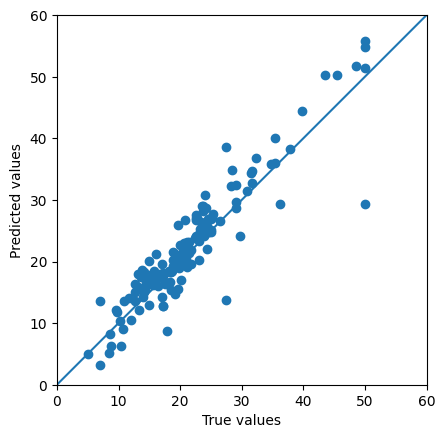

In [24]:
y_pred = model.predict(x_test).flatten()
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.plot([0, 60], [0, 60])